<a href="https://colab.research.google.com/github/springboardmentor789r/AgriYield/blob/Intern_PranjaliMore/ms3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Milestone1**

In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv("/content/sample_data/crop_yield_dataset.csv")

# Display first few rows
print(df.head())

# Check basic info
print(df.info())

# Summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())


         Date Crop_Type Soil_Type  Soil_pH  Temperature   Humidity  \
0  2014-01-01     Wheat     Peaty     5.50     9.440599  80.000000   
1  2014-01-01      Corn     Loamy     6.50    20.052576  79.947424   
2  2014-01-01      Rice     Peaty     5.50    12.143099  80.000000   
3  2014-01-01    Barley     Sandy     6.75    19.751848  80.000000   
4  2014-01-01   Soybean     Peaty     5.50    16.110395  80.000000   

   Wind_Speed     N     P     K  Crop_Yield  Soil_Quality  
0   10.956707  60.5  45.0  31.5    0.000000     22.833333  
1    8.591577  84.0  66.0  50.0  104.871310     66.666667  
2    7.227751  71.5  54.0  38.5    0.000000     27.333333  
3    2.682683  50.0  40.0  30.0   58.939796     35.000000  
4    7.696070  49.5  45.0  38.5   32.970413     22.166667  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36520 entries, 0 to 36519
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          36520

In [ ]:
# Check column names
print("Columns:", df.columns.tolist())

# Check number of unique values in categorical columns
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].nunique()} unique values")


Columns: ['Date', 'Crop_Type', 'Soil_Type', 'Soil_pH', 'Temperature', 'Humidity', 'Wind_Speed', 'N', 'P', 'K', 'Crop_Yield', 'Soil_Quality']
Date: 3652 unique values
Crop_Type: 10 unique values
Soil_Type: 5 unique values


In [ ]:
# Check how many null (NaN) values in each column
null_counts = df.isnull().sum()

# Check how many zero values in each column
zero_counts = (df == 0).sum()

# Combine both into one DataFrame for easy viewing
missing_summary = pd.DataFrame({
    'Null_Values': null_counts,
    'Zero_Values': zero_counts
})

# Sort for clarity
missing_summary = missing_summary.sort_values(by=['Null_Values', 'Zero_Values'], ascending=False)

print("\nSummary of Missing and Zero Values in Dataset:\n")
print(missing_summary)



Summary of Missing and Zero Values in Dataset:

              Null_Values  Zero_Values
Crop_Yield              0        11025
Date                    0            0
Crop_Type               0            0
Soil_Type               0            0
Soil_pH                 0            0
Temperature             0            0
Humidity                0            0
Wind_Speed              0            0
N                       0            0
P                       0            0
K                       0            0
Soil_Quality            0            0


In [ ]:
# Fill missing numeric values with mean
df.fillna(df.mean(numeric_only=True), inplace=True)

# For categorical columns, fill with mode
for col in df.select_dtypes(include='object').columns:
    df[col].fillna(df[col].mode()[0], inplace=True)


/tmp/ipython-input-3855845448.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [ ]:
from sklearn.preprocessing import StandardScaler

numeric_features = df.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

print(df.head())


         Date Crop_Type Soil_Type   Soil_pH  Temperature  Humidity  \
0  2014-01-01     Wheat     Peaty -1.349796    -1.611296  0.848671   
1  2014-01-01      Corn     Loamy -0.125748    -0.421665  0.840902   
2  2014-01-01      Rice     Peaty -1.349796    -1.308338  0.848671   
3  2014-01-01    Barley     Sandy  0.180264    -0.455378  0.848671   
4  2014-01-01   Soybean     Peaty -1.349796    -0.863594  0.848671   

   Wind_Speed         N         P         K  Crop_Yield  Soil_Quality  
0    0.312365 -0.506223 -0.909364 -1.231978   -1.044206     -0.829428  
1   -0.476467  1.652399  1.473544  0.934884    3.029956      1.646622  
2   -0.931338  0.504196  0.111882 -0.412084   -1.044206     -0.575232  
3   -2.447236 -1.470714 -1.476722 -1.407669    1.245555     -0.142159  
4   -0.775141 -1.516642 -0.909364 -0.412084    0.236666     -0.867086  


Milestone **2**

         Date Crop_Type Soil_Type  Soil_pH  Temperature   Humidity  \
0  2014-01-01     Wheat     Peaty     5.50     9.440599  80.000000   
1  2014-01-01      Corn     Loamy     6.50    20.052576  79.947424   
2  2014-01-01      Rice     Peaty     5.50    12.143099  80.000000   
3  2014-01-01    Barley     Sandy     6.75    19.751848  80.000000   
4  2014-01-01   Soybean     Peaty     5.50    16.110395  80.000000   

   Wind_Speed     N     P     K  Crop_Yield  Soil_Quality  
0   10.956707  60.5  45.0  31.5    0.000000     22.833333  
1    8.591577  84.0  66.0  50.0  104.871310     66.666667  
2    7.227751  71.5  54.0  38.5    0.000000     27.333333  
3    2.682683  50.0  40.0  30.0   58.939796     35.000000  
4    7.696070  49.5  45.0  38.5   32.970413     22.166667  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36520 entries, 0 to 36519
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          36520

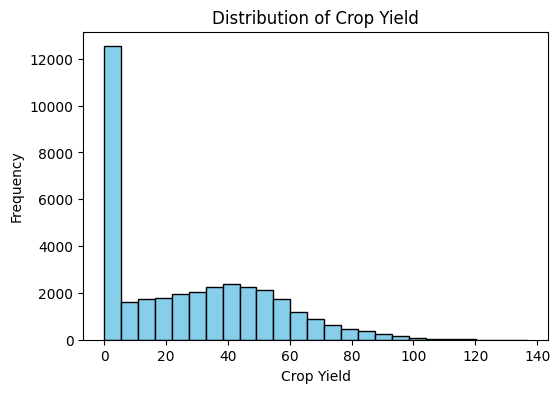

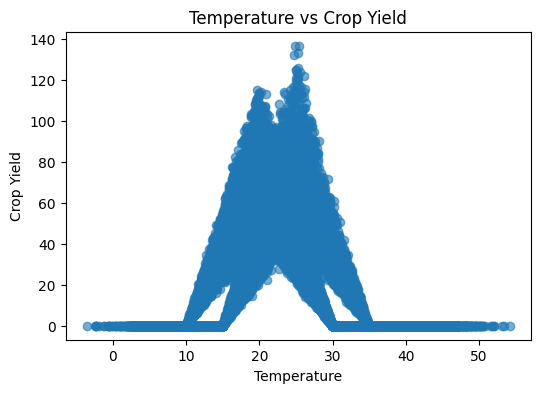

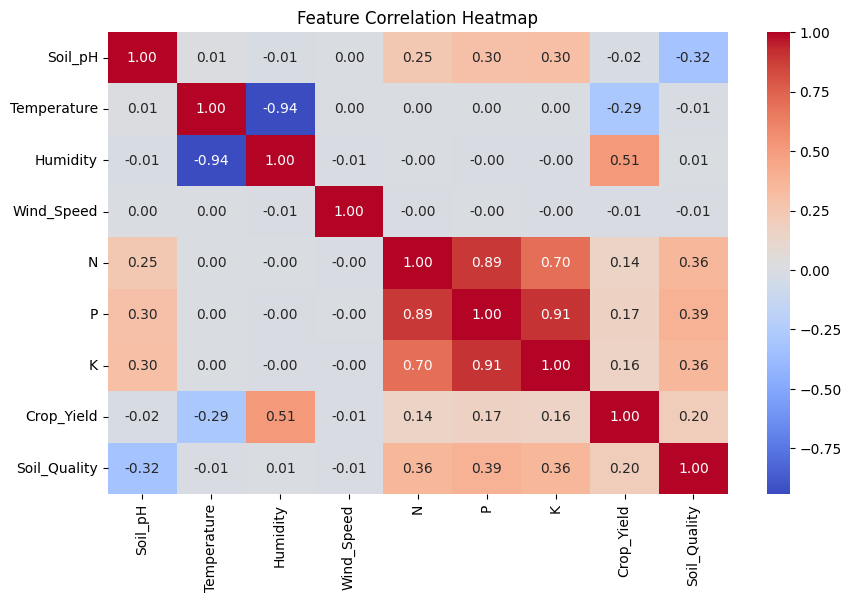

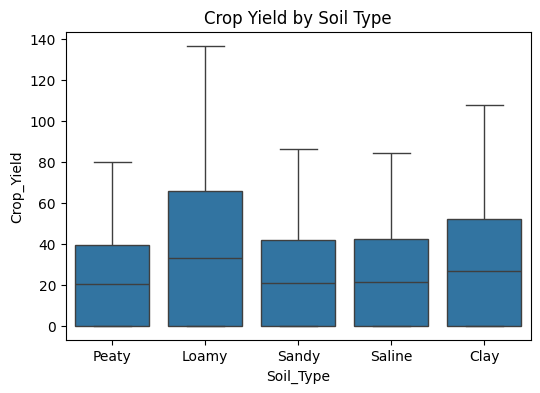

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the dataset
df = pd.read_csv("/content/sample_data/crop_yield_dataset.csv")

# Preview dataset
print(df.head())
print(df.info())  # optional: shows data types

# 1. Distribution of Crop Yield
plt.figure(figsize=(6,4))
plt.hist(df['Crop_Yield'], bins=25, color='skyblue', edgecolor='black')
plt.title("Distribution of Crop Yield")
plt.xlabel("Crop Yield")
plt.ylabel("Frequency")
plt.show()

# 2. Relationship between Temperature and Yield
if 'Temperature' in df.columns:
    plt.figure(figsize=(6,4))
    plt.scatter(df['Temperature'], df['Crop_Yield'], alpha=0.6)
    plt.title("Temperature vs Crop Yield")
    plt.xlabel("Temperature")
    plt.ylabel("Crop Yield")
    plt.show()
else:
    print("⚠️ Column 'Temperature' not found in dataset")

# 3. Correlation Heatmap (numeric relationships only)
plt.figure(figsize=(10,6))
numeric_df = df.select_dtypes(include=['number'])   # ✅ only numeric columns
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

# 4. Boxplot: Crop Yield by Soil Type (categorical insight)
if 'Soil_Type' in df.columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='Soil_Type', y='Crop_Yield', data=df)
    plt.title("Crop Yield by Soil Type")
    plt.show()
else:
    print("⚠️ Column 'Soil_Type' not found in dataset")


In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
import pandas as pd

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_cols.tolist())

# Example 1: Label Encoding
label_encoded_df = df.copy()
for col in categorical_cols:
    label_encoder = LabelEncoder()
    label_encoded_df[col] = label_encoder.fit_transform(label_encoded_df[col])

# Example 2: One-Hot Encoding
onehot_encoded_df = pd.get_dummies(df, columns=categorical_cols)

# Example 3: Ordinal Encoding (if categories have order)
ordinal_encoder = OrdinalEncoder()
ordinal_encoded_df = df.copy()
ordinal_encoded_df[categorical_cols] = ordinal_encoder.fit_transform(df[categorical_cols])


Categorical Columns: ['Date', 'Crop_Type', 'Soil_Type']


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Standard Scaler
standard_scaled_df = df.copy()
standard_scaled_df[numeric_cols] = StandardScaler().fit_transform(df[numeric_cols])

# MinMax Scaler
minmax_scaled_df = df.copy()
minmax_scaled_df[numeric_cols] = MinMaxScaler().fit_transform(df[numeric_cols])

# Robust Scaler
robust_scaled_df = df.copy()
robust_scaled_df[numeric_cols] = RobustScaler().fit_transform(df[numeric_cols])



In [ ]:
print(df.columns.tolist())


['Date', 'Crop_Type', 'Soil_Type', 'Soil_pH', 'Temperature', 'Humidity', 'Wind_Speed', 'N', 'P', 'K', 'Crop_Yield', 'Soil_Quality']


In [ ]:

df['Total_Nutrients'] = df['N'] + df['P'] + df['K']
df['Temp_Humidity_Index'] = df['Temperature'] * df['Humidity']
df['Wind_Temp_Ratio'] = df['Wind_Speed'] / (df['Temperature'] + 1)
df['Nutrient_Density'] = df['Total_Nutrients'] / (df['Soil_pH'] + 1)



In [ ]:
print(df.head())
print(df.columns)


         Date Crop_Type Soil_Type  Soil_pH  Temperature   Humidity  \
0  2014-01-01     Wheat     Peaty     5.50     9.440599  80.000000   
1  2014-01-01      Corn     Loamy     6.50    20.052576  79.947424   
2  2014-01-01      Rice     Peaty     5.50    12.143099  80.000000   
3  2014-01-01    Barley     Sandy     6.75    19.751848  80.000000   
4  2014-01-01   Soybean     Peaty     5.50    16.110395  80.000000   

   Wind_Speed     N     P     K  Crop_Yield  Soil_Quality  Total_Nutrients  \
0   10.956707  60.5  45.0  31.5    0.000000     22.833333            137.0   
1    8.591577  84.0  66.0  50.0  104.871310     66.666667            200.0   
2    7.227751  71.5  54.0  38.5    0.000000     27.333333            164.0   
3    2.682683  50.0  40.0  30.0   58.939796     35.000000            120.0   
4    7.696070  49.5  45.0  38.5   32.970413     22.166667            133.0   

   Temp_Humidity_Index  Wind_Temp_Ratio  Nutrient_Density  
0           755.247953         1.049433         21

In [ ]:
null_counts = df.isnull().sum()
zero_counts = (df == 0).sum()

missing_summary = pd.DataFrame({
    'Null_Values': null_counts,
    'Zero_Values': zero_counts
})
print(missing_summary)


                     Null_Values  Zero_Values
Date                           0            0
Crop_Type                      0            0
Soil_Type                      0            0
Soil_pH                        0            0
Temperature                    0            0
Humidity                       0            0
Wind_Speed                     0            0
N                              0            0
P                              0            0
K                              0            0
Crop_Yield                     0        11025
Soil_Quality                   0            0
Total_Nutrients                0            0
Temp_Humidity_Index            0            0
Wind_Temp_Ratio                0            0
Nutrient_Density               0            0


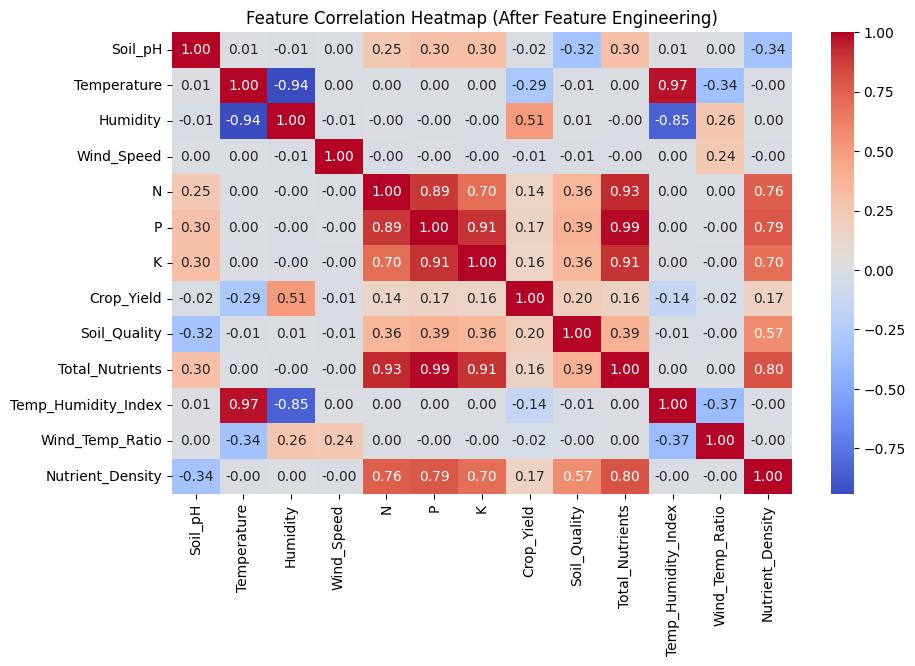

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap (After Feature Engineering)")
plt.show()





Milestone **3**

In [ ]:
# common imports
import pandas as pd
import numpy as np
df = pd.read_csv('/content/sample_data/crop_yield_dataset.csv')
print(df.columns)

# identify columns
target = 'Crop_Yield'
date_col = 'Date'   # if present
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
cat_cols = [c for c in cat_cols if c not in [date_col, target]]

num_cols = df.select_dtypes(include=['number']).columns.tolist()
num_cols = [c for c in num_cols if c != target]

print("Categorical:", cat_cols)
print("Numerical:", num_cols)



Index(['Date', 'Crop_Type', 'Soil_Type', 'Soil_pH', 'Temperature', 'Humidity',
       'Wind_Speed', 'N', 'P', 'K', 'Crop_Yield', 'Soil_Quality'],
      dtype='object')
Categorical: ['Crop_Type', 'Soil_Type']
Numerical: ['Soil_pH', 'Temperature', 'Humidity', 'Wind_Speed', 'N', 'P', 'K', 'Soil_Quality']


In [ ]:
# =========================
# 1️⃣ Common Imports
# =========================
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# =========================
# 2️⃣ Load Dataset
# =========================
df = pd.read_csv('/content/sample_data/crop_yield_dataset.csv')

# =========================
# 3️⃣ Identify Columns
# =========================
target = 'Crop_Yield'
date_col = 'Date'  # if present
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
cat_cols = [c for c in cat_cols if c not in [date_col, target]]
num_cols = df.select_dtypes(include=['number']).columns.tolist()
num_cols = [c for c in num_cols if c != target]

print("Categorical Columns:", cat_cols)
print("Numerical Columns:", num_cols)

# =========================
# 4️⃣ Split Data
# =========================
X = df.drop(columns=[target, date_col], errors='ignore')
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# =========================
# 5️⃣ Define Encoders, Scalers, and Models
# =========================
encoder_options = {
    'onehot': OneHotEncoder(handle_unknown='ignore', sparse_output=False),
    'ordinal': OrdinalEncoder()
}

scaler_options = {
    'standard': StandardScaler(),
    'minmax': MinMaxScaler(),
    'robust': RobustScaler()
}

model_options = {
    'linear': LinearRegression(),
    'randomforest': RandomForestRegressor(random_state=42),
    'xgboost': XGBRegressor(random_state=42, verbosity=0)
}

# =========================
# 6️⃣ Evaluation Function
# =========================
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # fixed ✅
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return {'RMSE': rmse, 'MAE': mae, 'R2': r2}

# =========================
# 7️⃣ Loop Through All Combos
# =========================
results = []

for enc_name, encoder in encoder_options.items():
    for sc_name, scaler in scaler_options.items():
        for model_name, model in model_options.items():

            # define preprocessor
            preprocessor = ColumnTransformer(
                transformers=[
                    ('cat', encoder, cat_cols),
                    ('num', scaler, num_cols)
                ]
            )

            # build pipeline
            pipe = Pipeline([
                ('preprocessor', preprocessor),
                ('model', model)
            ])

            # fit model
            pipe.fit(X_train, y_train)

            # evaluate
            metrics = evaluate_model(pipe, X_test, y_test)
            metrics.update({'encoder': enc_name, 'scaler': sc_name, 'model': model_name})
            results.append(metrics)
            print(f"✅ Done: {enc_name}, {sc_name}, {model_name}")

# =========================
# 8️⃣ Compare Results
# =========================
results_df = pd.DataFrame(results)
print("\n===== Model Performance Summary =====")
print(results_df.sort_values(by='RMSE', ascending=True))


Categorical Columns: ['Crop_Type', 'Soil_Type']
Numerical Columns: ['Soil_pH', 'Temperature', 'Humidity', 'Wind_Speed', 'N', 'P', 'K', 'Soil_Quality']
✅ Done: onehot, standard, linear
✅ Done: onehot, standard, randomforest
✅ Done: onehot, standard, xgboost
✅ Done: onehot, minmax, linear
✅ Done: onehot, minmax, randomforest
✅ Done: onehot, minmax, xgboost
✅ Done: onehot, robust, linear
✅ Done: onehot, robust, randomforest
✅ Done: onehot, robust, xgboost
✅ Done: ordinal, standard, linear
✅ Done: ordinal, standard, randomforest
✅ Done: ordinal, standard, xgboost
✅ Done: ordinal, minmax, linear
✅ Done: ordinal, minmax, randomforest
✅ Done: ordinal, minmax, xgboost
✅ Done: ordinal, robust, linear
✅ Done: ordinal, robust, randomforest
✅ Done: ordinal, robust, xgboost

===== Model Performance Summary =====
         RMSE        MAE        R2  encoder    scaler         model
5    4.007100   2.460040  0.975921   onehot    minmax       xgboost
2    4.014721   2.456114  0.975829   onehot  standard

In [ ]:
# Example: pipeline + GridSearch for RF
from sklearn.model_selection import GridSearchCV
preproc = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols),
    ('num', StandardScaler(), num_cols)
], sparse_threshold=0)

pipe = Pipeline([('preproc', preproc), ('model', RandomForestRegressor(random_state=42))])

param_grid = {
    'model__n_estimators': [50],
    'model__max_depth': [None,5],
    'model__min_samples_split': [2, 5]
}

gcv = GridSearchCV(pipe, param_grid, cv=3, scoring='neg_root_mean_squared_error', n_jobs=-1, verbose=1)
gcv.fit(X_train, y_train)
print("Best params:", gcv.best_params_)
print("CV best RMSE:", -gcv.best_score_)

best_pipe = gcv.best_estimator_
print("Test eval:", evaluate_model(best_pipe, X_test, y_test))
joblib.dump(best_pipe, "best_pipeline_rf.joblib")

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best params: {'model__max_depth': None, 'model__min_samples_split': 5, 'model__n_estimators': 50}
CV best RMSE: 4.000080146346882
Test eval: {'RMSE': np.float64(4.054935397967191), 'MAE': 2.3490084899134733, 'R2': 0.9753422133759074}


['best_pipeline_rf.joblib']

n_features: 23 ['Crop_Type_Barley', 'Crop_Type_Corn', 'Crop_Type_Cotton', 'Crop_Type_Potato', 'Crop_Type_Rice', 'Crop_Type_Soybean', 'Crop_Type_Sugarcane', 'Crop_Type_Sunflower', 'Crop_Type_Tomato', 'Crop_Type_Wheat', 'Soil_Type_Clay', 'Soil_Type_Loamy', 'Soil_Type_Peaty', 'Soil_Type_Saline', 'Soil_Type_Sandy', 'Soil_pH', 'Temperature', 'Humidity', 'Wind_Speed', 'N']
Temperature            0.565556
Humidity               0.172724
Soil_Quality           0.086511
Crop_Type_Sugarcane    0.041512
Crop_Type_Rice         0.040159
Crop_Type_Tomato       0.039085
N                      0.020618
P                      0.012375
Wind_Speed             0.007091
Crop_Type_Corn         0.006979
Soil_Type_Clay         0.003083
Crop_Type_Cotton       0.001270
K                      0.000811
Soil_pH                0.000659
Soil_Type_Loamy        0.000486
Crop_Type_Potato       0.000193
Crop_Type_Wheat        0.000178
Soil_Type_Peaty        0.000177
Crop_Type_Soybean      0.000134
Crop_Type_Barley      

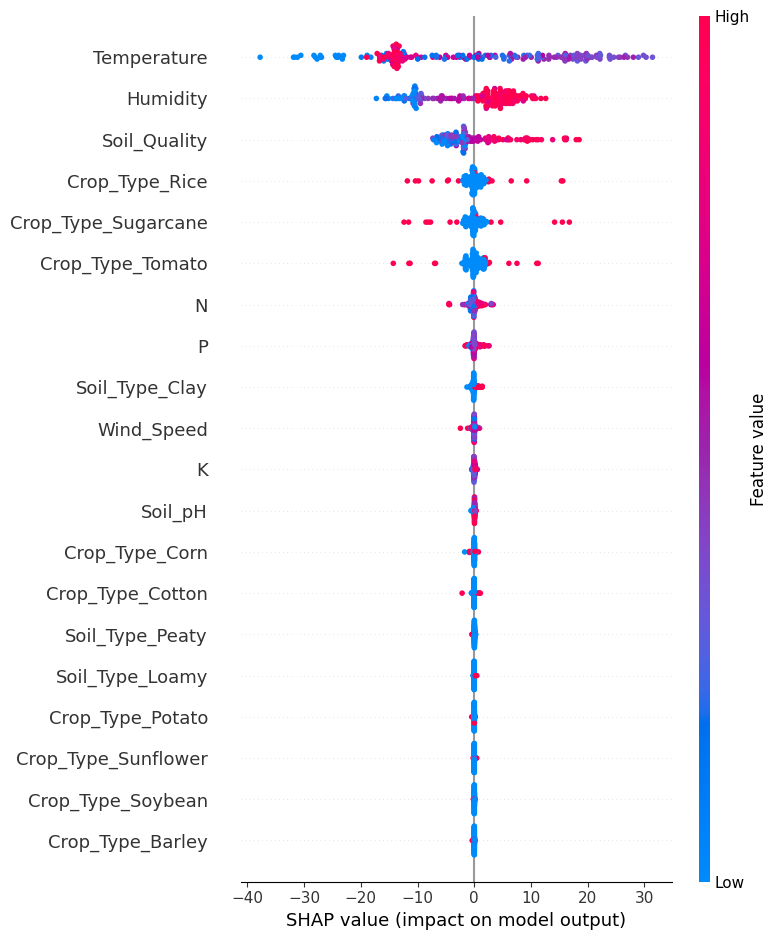

In [ ]:
# get feature names after preprocessing (works for OneHotEncoder)
def get_feature_names(preproc):
    out = []
    for name, trans, cols in preproc.transformers_:
        if name == 'remainder':
            continue
        if hasattr(trans, 'get_feature_names_out'):
            names = list(trans.get_feature_names_out(cols))
        else:
            names = cols
        out.extend(names)
    return out

preproc = best_pipe.named_steps['preproc']
feat_names = get_feature_names(preproc)
print("n_features:", len(feat_names), feat_names[:20])

# feature importance (tree)
if hasattr(best_pipe.named_steps['model'], 'feature_importances_'):
    importances = best_pipe.named_steps['model'].feature_importances_
    fi = pd.Series(importances, index=feat_names).sort_values(ascending=False)
    print(fi.head(20))

# SHAP (for tree models)
import shap
# prepare small sample (preprocessed)
X_sample = X_test.iloc[:200]  # limit size
X_pre = preproc.transform(X_sample)  # numpy array

model = best_pipe.named_steps['model']
if model.__class__.__name__ in ['RandomForestRegressor','XGBRegressor']:
    explainer = shap.Explainer(model)
    shap_values = explainer(X_pre)
    shap.summary_plot(shap_values, X_pre, feature_names=feat_names)
else:
    print("SHAP example works best for tree ensemble models.")


In [ ]:
# suppose best_pipe is chosen
joblib.dump(best_pipe, "best_model_pipeline.joblib")
# To load later:
# loaded = joblib.load("best_model_pipeline.joblib")


['best_model_pipeline.joblib']

In [ ]:
def predict_from_input(model_pipeline, input_dict):
    # input_dict must have all feature columns except target
    X_new = pd.DataFrame([input_dict])
    return float(model_pipeline.predict(X_new)[0])

# example:
# pred = predict_from_input(loaded, {'Crop_Type':'maize', 'Soil_Type':'loam', 'Temperature':25, ...})


In [ ]:
import pandas as pd

df = pd.read_csv("/content/sample_data/crop_yield_dataset.csv")# Load dataset
  # change path
date_col = 'Date'  # change to your actual date column

# Parse date column
df[date_col] = pd.to_datetime(df[date_col])

# Remove rows where Crop_Yield == 0
df_ts = df[df['Crop_Yield'] != 0].copy()

# Set Date as index
df_ts.set_index(date_col, inplace=True)

# Select only numeric columns
numeric_df = df_ts.select_dtypes(include='number')

# Resample numeric data daily (mean) and interpolate missing
daily_numeric = numeric_df.resample('D').mean().interpolate()

# Optional: keep categorical columns separately (like Crop_Type)
categorical_df = df_ts.select_dtypes(exclude='number').resample('D').first()

# Combine both (optional)
daily = pd.concat([daily_numeric, categorical_df], axis=1)

print(daily.head(), daily.shape)



             Soil_pH  Temperature   Humidity  Wind_Speed          N  \
Date                                                                  
2014-01-01  6.250000    17.832341  79.992489    7.649061  61.285714   
2014-01-02  6.928571    17.403738  79.997477    9.731096  67.285714   
2014-01-03  6.250000    17.710699  78.611669   12.161914  60.785714   
2014-01-04  7.125000    17.068594  79.349411    9.476664  69.375000   
2014-01-05  6.375000    15.439732  80.000000   10.793227  68.062500   

                    P          K  Crop_Yield  Soil_Quality Crop_Type Soil_Type  
Date                                                                            
2014-01-01  50.142857  40.142857   52.962570     41.714286      Corn     Loamy  
2014-01-02  54.500000  43.785714   49.481053     31.964286     Wheat     Peaty  
2014-01-03  49.571429  40.142857   31.582386     40.601190      Corn     Peaty  
2014-01-04  56.000000  44.937500   35.247034     38.703125     Wheat     Loamy  
2014-01-05  54.5

ADF statistic: -7.515123552691614 p-value: 3.9216745537992005e-11
KPSS statistic: 0.04265281096615883 p-value: 0.1


/tmp/ipython-input-2077400746.py:10: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_res = kpss(daily['Crop_Yield'].dropna(), nlags='auto')


<Figure size 1000x400 with 0 Axes>

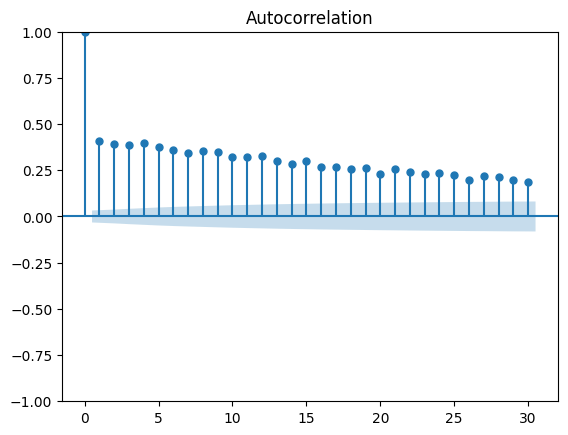

<Figure size 1000x400 with 0 Axes>

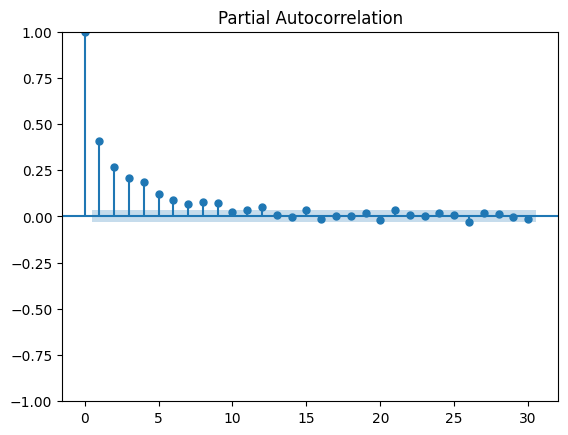

In [ ]:
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# ADF Test
adf_res = adfuller(daily['Crop_Yield'].dropna())
print("ADF statistic:", adf_res[0], "p-value:", adf_res[1])

# KPSS Test
kpss_res = kpss(daily['Crop_Yield'].dropna(), nlags='auto')
print("KPSS statistic:", kpss_res[0], "p-value:", kpss_res[1])

# ACF/PACF plots
plt.figure(figsize=(10,4))
plot_acf(daily['Crop_Yield'].dropna(), lags=30)
plt.show()

plt.figure(figsize=(10,4))
plot_pacf(daily['Crop_Yield'].dropna(), lags=30)
plt.show()


In [ ]:
pip install prophet --upgrade


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 30.3 MB/s eta 0:00:00
  Attempting uninstall: prophet
    Found existing installation: prophet 1.1.7
    Uninstalling prophet-1.1.7:
      Successfully uninstalled prophet-1.1.7


/tmp/ipython-input-4259060916.py:48: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  daily = daily.interpolate()


ARIMA → RMSE: 12.721, MAE: 10.444, R²: -0.091


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Prophet → RMSE: 9.613, MAE: 7.203, R²: 0.377
Random Forest → RMSE: 6.197, MAE: 4.763, R²: 0.741


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
LSTM → RMSE: 10.440, MAE: 7.938, R²: 0.265

Model Comparison:
           Model       RMSE        MAE        R2
0          ARIMA  12.721303  10.443555 -0.091480
1        Prophet   9.613110   7.202729  0.376724
2  Random Forest   6.197300   4.763214  0.740571
3           LSTM  10.439964   7.938013  0.264893


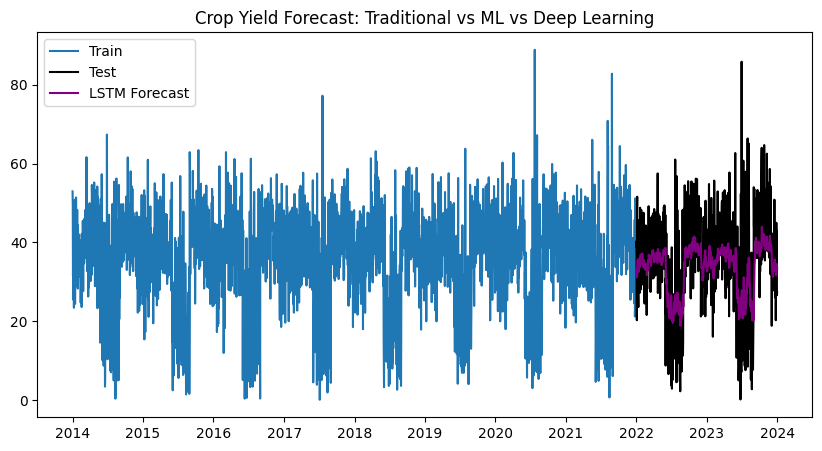

In [ ]:
# -------------------------------
# 1️⃣ Import libraries
# -------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from prophet import Prophet
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# -------------------------------
# 2️⃣ Prepare data (from cell ZuwLaHkzOQf6)
# -------------------------------
df = pd.read_csv("/content/sample_data/crop_yield_dataset.csv")# Load dataset
date_col = 'Date'  # change path

# Parse date column
df[date_col] = pd.to_datetime(df[date_col])

# Remove rows where Crop_Yield == 0
df_ts = df[df['Crop_Yield'] != 0].copy()

# Set Date as index
df_ts.set_index(date_col, inplace=True)

# Select only numeric columns
numeric_df = df_ts.select_dtypes(include='number')

# Resample numeric data daily (mean) and interpolate missing
daily_numeric = numeric_df.resample('D').mean().interpolate()

# Optional: keep categorical columns separately (like Crop_Type)
categorical_df = df_ts.select_dtypes(exclude='number').resample('D').first()

# Combine both (optional)
daily = pd.concat([daily_numeric, categorical_df], axis=1)


daily = daily.copy()
daily = daily.asfreq('D')
daily = daily.interpolate()

split = int(len(daily) * 0.8)
train, test = daily.iloc[:split], daily.iloc[split:]

# -------------------------------
# 3️⃣ Evaluation helper (fixed RMSE calc)
# -------------------------------
def evaluate(true, pred, name):
    rmse = mean_squared_error(true, pred) ** 0.5   # ✅ fixed squared=False
    mae = mean_absolute_error(true, pred)
    r2 = r2_score(true, pred)
    print(f"{name} → RMSE: {rmse:.3f}, MAE: {mae:.3f}, R²: {r2:.3f}")
    return {'Model': name, 'RMSE': rmse, 'MAE': mae, 'R2': r2}

results = []

# -------------------------------
# 4️⃣ ARIMA
# -------------------------------
try:
    arima_model = ARIMA(train['Crop_Yield'], order=(1,1,1))
    arima_fit = arima_model.fit()
    arima_forecast = arima_fit.forecast(steps=len(test))
    results.append(evaluate(test['Crop_Yield'], arima_forecast, 'ARIMA'))
except Exception as e:
    print("ARIMA Error:", e)

# -------------------------------
# 5️⃣ Prophet
# -------------------------------
try:
    df_prophet = train.reset_index()[['Date','Crop_Yield']].rename(columns={'Date':'ds','Crop_Yield':'y'})
    m = Prophet()
    m.fit(df_prophet)

    future = test.reset_index()[['Date']].rename(columns={'Date':'ds'})
    forecast = m.predict(future)
    prophet_pred = forecast['yhat'].values
    results.append(evaluate(test['Crop_Yield'].values, prophet_pred, 'Prophet'))
except Exception as e:
    print("Prophet Error:", e)

# -------------------------------
# 6️⃣ Random Forest (lag features + encoding)
# -------------------------------
try:
    df_rf = daily.copy()
    for lag in range(1, 6):
        df_rf[f'lag_{lag}'] = df_rf['Crop_Yield'].shift(lag)
    df_rf = df_rf.dropna()

    # ✅ Encode non-numeric columns
    for col in df_rf.select_dtypes(include='object').columns:
        df_rf[col] = LabelEncoder().fit_transform(df_rf[col])

    X = df_rf.drop('Crop_Yield', axis=1)
    y = df_rf['Crop_Yield']
    X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)
    rf_pred = rf.predict(X_test)
    results.append(evaluate(y_test, rf_pred, 'Random Forest'))
except Exception as e:
    print("Random Forest Error:", e)

# -------------------------------
# 7️⃣ LSTM (Deep Learning)
# -------------------------------
try:
    scaler = MinMaxScaler()
    scaled = scaler.fit_transform(daily[['Crop_Yield']])

    n_input = 10
    n_features = 1
    generator = TimeseriesGenerator(scaled, scaled, length=n_input, batch_size=16)

    split_index = int(len(generator)*0.8)
    train_gen = TimeseriesGenerator(scaled[:split], scaled[:split], length=n_input, batch_size=16)
    test_gen = TimeseriesGenerator(scaled[split-n_input:], scaled[split-n_input:], length=n_input, batch_size=16)

    model = Sequential([
        LSTM(64, activation='relu', input_shape=(n_input, n_features)),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')

    early_stop = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)
    model.fit(train_gen, epochs=50, verbose=0, callbacks=[early_stop])

    lstm_pred = model.predict(test_gen)
    true_vals = scaled[split:]
    lstm_pred_inv = scaler.inverse_transform(lstm_pred)
    true_inv = scaler.inverse_transform(true_vals)

    results.append(evaluate(true_inv[:len(lstm_pred_inv)], lstm_pred_inv, 'LSTM'))
except Exception as e:
    print("LSTM Error:", e)

# -------------------------------
# 8️⃣ Results summary
# -------------------------------
results_df = pd.DataFrame(results)
print("\nModel Comparison:")
print(results_df)

# -------------------------------
# 9️⃣ Plot comparison
# -------------------------------
plt.figure(figsize=(10,5))
plt.plot(train.index, train['Crop_Yield'], label='Train')
plt.plot(test.index, test['Crop_Yield'], label='Test', color='black')

try:
    plt.plot(test.index[:len(lstm_pred_inv)], lstm_pred_inv, label='LSTM Forecast', color='purple')
except:
    pass

plt.legend()
plt.title("Crop Yield Forecast: Traditional vs ML vs Deep Learning")
plt.show()

In [ ]:
import joblib

# Save the model
joblib.dump(rf, 'random_forest_model.pkl')
print("✅ Random Forest model saved as 'random_forest_model.pkl'")

# Load the model (for testing or in a new session)
loaded_rf = joblib.load('random_forest_model.pkl')
print("✅ Model loaded successfully and ready to use")

# Test loaded model
sample_pred = loaded_rf.predict(X_test[:5])
print("Sample Predictions:", sample_pred)


✅ Random Forest model saved as 'random_forest_model.pkl'
✅ Model loaded successfully and ready to use
Sample Predictions: [40.77092648 25.79318783 41.66046434 50.68758796 35.00510537]


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Predict on test set
y_pred_loaded = loaded_rf.predict(X_test)

# Evaluate metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred_loaded))
mae = mean_absolute_error(y_test, y_pred_loaded)
r2 = r2_score(y_test, y_pred_loaded)

print(f"Loaded Model Performance → RMSE: {rmse:.3f}, MAE: {mae:.3f}, R²: {r2:.3f}")


Loaded Model Performance → RMSE: 6.197, MAE: 4.763, R²: 0.741


In [ ]:
# Example: New input data
# The input data must be in a pandas DataFrame with the same columns as the training data
# before lag features were added and categorical features were encoded.
# Based on the training data, the original columns used were:
# 'Soil_pH', 'Temperature', 'Humidity', 'Wind_Speed', 'N', 'P', 'K', 'Soil_Quality', 'Crop_Type', 'Soil_Type'
# We also need to provide recent 'Crop_Yield' values to create lag features.

# Example new data (replace with your actual new data)
# This dictionary should represent one row of data with the original features
new_input_dict = {
    'Soil_pH': 6.0,
    'Temperature': 22.0,
    'Humidity': 75.0,
    'Wind_Speed': 12.0,
    'N': 110,
    'P': 50,
    'K': 60,
    'Soil_Quality': 50,
    'Crop_Type': 'Wheat',
    'Soil_Type': 'Loamy'
}

# To create lag features for prediction, we need the last 5 days of 'Crop_Yield' data
# from the historical daily data that was used for training the model.
# Assuming 'daily' DataFrame contains the historical data up to the day before the new data.

# Get the last 5 'Crop_Yield' values from the historical data
last_5_yields = daily['Crop_Yield'].tail(5).tolist()

# Create a DataFrame for the new input, including original features and lag features
# The order of columns must match the training data's X
# The lag features should be in the order lag_1, lag_2, ..., lag_5
# The values for lag_1 to lag_5 will be the last 5 historical yield values

# Combine the new input dictionary with lag features.
# The lag features need to be added as columns to the new data DataFrame in the correct order.
# We need to get the column order from the training data X to ensure consistency.

# Get the column order from the training data used for the Random Forest model
rf_trained_cols = X_train.columns.tolist()

# Create a DataFrame for the new input using the original features
new_data_df_original = pd.DataFrame([new_input_dict])

# Add lag features to the new data DataFrame.
# The values for lag_1, lag_2, etc., should be the last observed crop yields.
# Assuming last_5_yields are ordered from oldest to newest.
# lag_1 is the most recent past value, lag_5 is the oldest.
# So, last_5_yields[4] is lag_1, last_5_yields[3] is lag_2, and so on.
for i in range(5):
    # This assumes last_5_yields has at least 5 values.
    # If not, you'll need to handle missing lag values (e.g., fill with mean/median from training data).
    new_data_df_original[f'lag_{i+1}'] = last_5_yields[4-i]


# Ensure the new data DataFrame has the same columns as the training data X
# and in the same order.
# First, handle categorical columns using the same LabelEncoder that was used during training.
# Note: We need the original LabelEncoder instances or re-fit them on the combined historical and new data.
# Since we don't have the original encoders readily available here, we will refit.
# This might be a simplification if the training data had categories not present in the last_5_yields or new_input_dict.
# A more robust solution would save/load the fitted encoders.

# Recreate the LabelEncoders based on the full 'daily' dataframe used for the RF model training
label_encoders = {}
for col in daily.select_dtypes(include='object').columns:
     le = LabelEncoder()
     # Fit on the entire 'daily' dataframe to include all possible categories
     le.fit(daily[col])
     label_encoders[col] = le
     # Transform the categorical columns in the new data DataFrame
     new_data_df_original[col] = label_encoders[col].transform(new_data_df_original[col])


# Reorder columns to match X_train
new_data_df_processed = new_data_df_original[rf_trained_cols]


predicted_yield = loaded_rf.predict(new_data_df_processed)
print("🌾 Predicted Crop Yield:", predicted_yield[0])

🌾 Predicted Crop Yield: 56.88740450621629


In [ ]:
import pickle

# Save
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Load
with open('model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)


In [ ]:
import joblib

# Save
joblib.dump(model, 'model.pkl')

# Load
loaded_model = joblib.load('model.pkl')


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


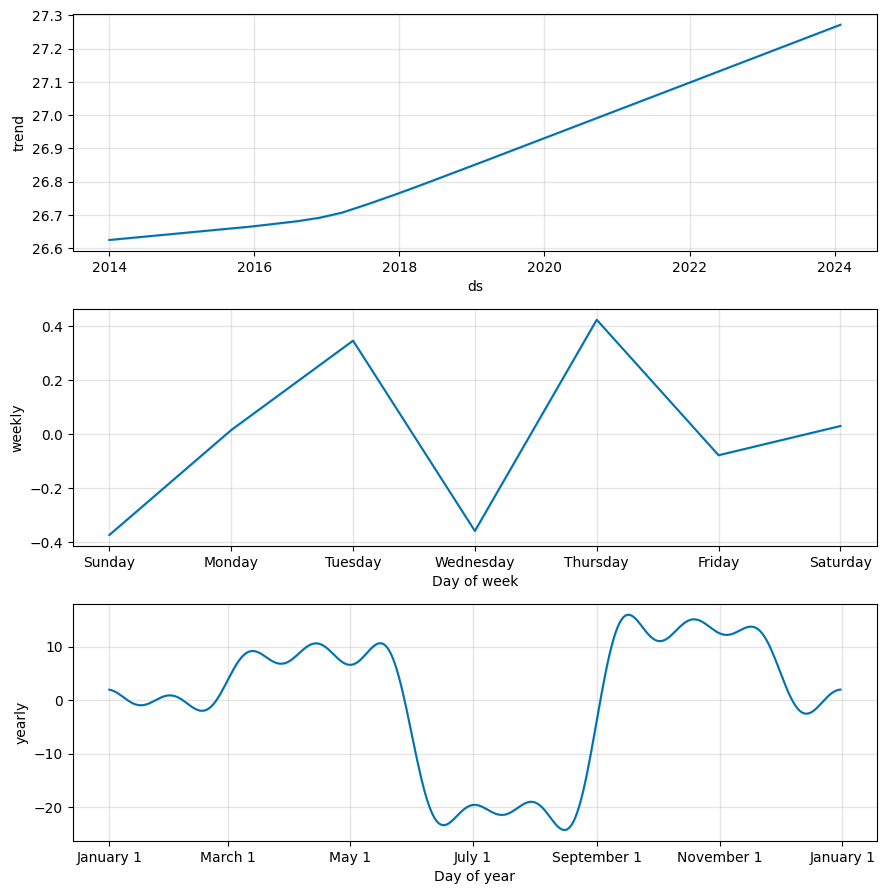

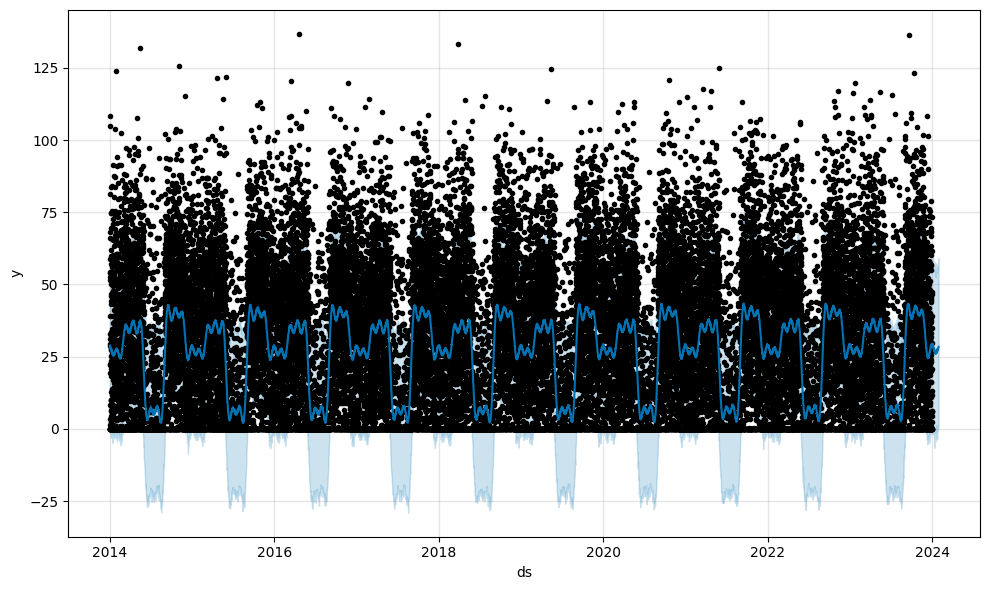

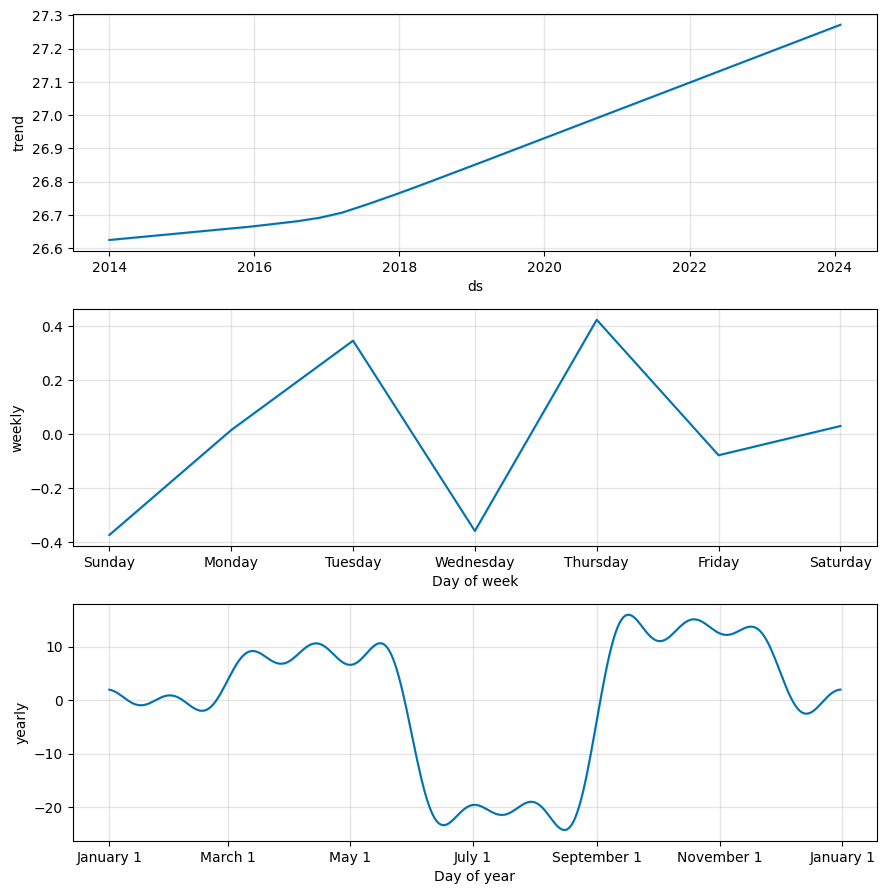

In [ ]:
from prophet import Prophet
import pandas as pd

# Prepare data
df_prophet = df[['Date', 'Crop_Yield']].rename(columns={'Date': 'ds', 'Crop_Yield': 'y'})

# Initialize & fit
model_prophet = Prophet()
model_prophet.fit(df_prophet)

# Forecast
future = model_prophet.make_future_dataframe(periods=30)
forecast = model_prophet.predict(future)

# Visualize
model_prophet.plot(forecast)
model_prophet.plot_components(forecast)


In [ ]:
from prophet import Prophet
model = Prophet(stan_backend='CMDSTANPY')


In [ ]:
X = df_rf.drop(['Crop_Yield', 'Crop_Type'], axis=1)

In [ ]:
import joblib
joblib.dump(rf, 'random_forest_model.pkl')
print("✅ Random Forest model saved as 'random_forest_model.pkl'")


✅ Random Forest model saved as 'random_forest_model.pkl'


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


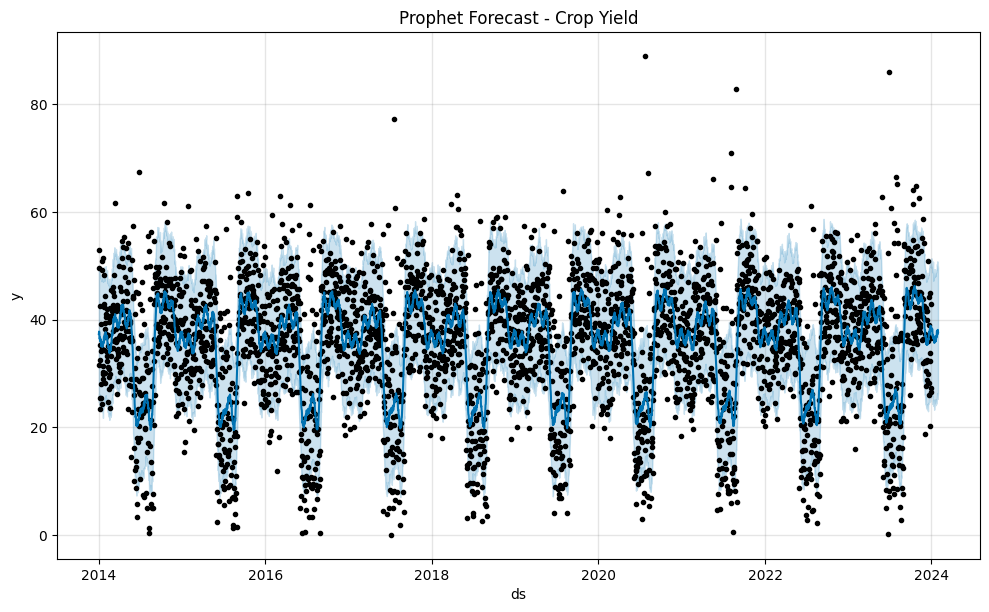

In [ ]:
from prophet import Prophet
df_prophet = daily.reset_index()[['Date','Crop_Yield']].rename(columns={'Date':'ds','Crop_Yield':'y'})

m = Prophet()
m.fit(df_prophet)

future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)

m.plot(forecast)
plt.title("Prophet Forecast - Crop Yield")
plt.show()


✅ Random Forest model saved as 'random_forest_model.pkl'
✅ Model loaded successfully and ready to use
Sample Predictions: [40.77092648 25.79318783 41.66046434 50.68758796 35.00510537]


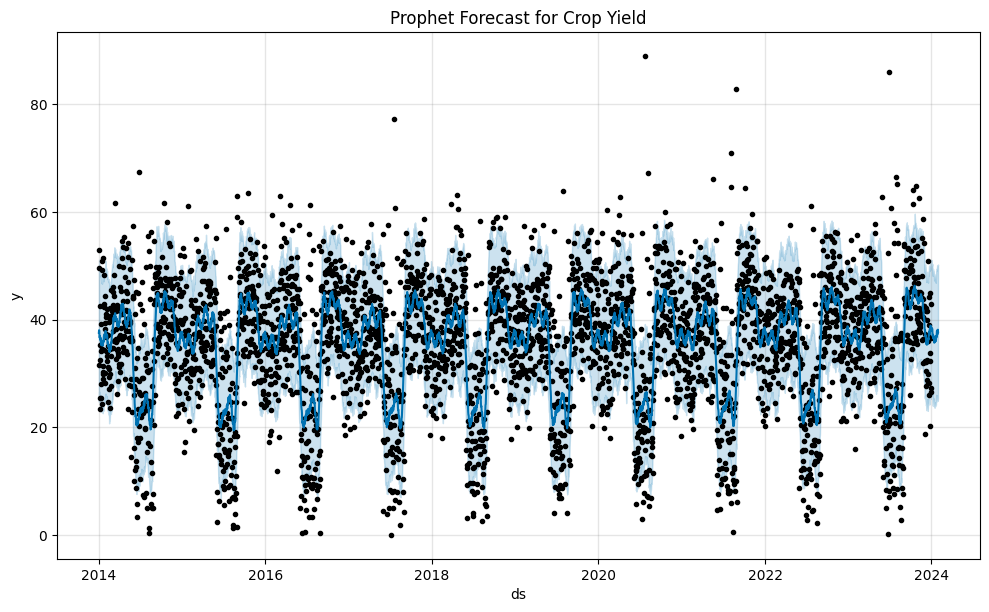

In [ ]:
# ----------------------------------
# 1️⃣ Export the Regression Model
# ----------------------------------
import joblib

# Save trained Random Forest model
joblib.dump(rf, 'random_forest_model.pkl')
print("✅ Random Forest model saved as 'random_forest_model.pkl'")

# Load it later for reuse
loaded_rf = joblib.load('random_forest_model.pkl')
print("✅ Model loaded successfully and ready to use")

# Test prediction
sample_pred = loaded_rf.predict(X_test[:5])
print("Sample Predictions:", sample_pred)

# ----------------------------------
# 2️⃣ Implement Prophet Model (Meta)
# ----------------------------------
from prophet import Prophet

# Prepare data for Prophet
df_prophet = daily.reset_index()[['Date', 'Crop_Yield']]
df_prophet = df_prophet.rename(columns={'Date': 'ds', 'Crop_Yield': 'y'})

# Initialize and train the Prophet model
prophet_model = Prophet(daily_seasonality=True)
prophet_model.fit(df_prophet)

# Create future dates
future_dates = prophet_model.make_future_dataframe(periods=30)  # forecast for next 30 days
forecast = prophet_model.predict(future_dates)

# Visualize forecast
prophet_model.plot(forecast)
plt.title("Prophet Forecast for Crop Yield")
plt.show()
